<a href="https://colab.research.google.com/github/Guna940/EX07-Convolutional-Autoencoder-for-Image-Denoising/blob/main/EX07_Convolutional_Autoencoder_for_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [4]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape) 
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

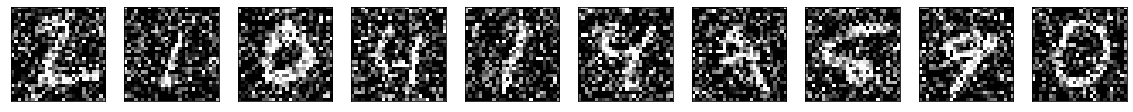

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
model=Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.MaxPool2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.MaxPool2D((2,2), padding='same'), 
    layers.Conv2D(8, (3,3), activation ='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(16, (5,5), activation='relu', padding='same'),
    layers.UpSampling2D((3,3)),
    layers.Conv2D(1, (3,3), activation="sigmoid")
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
model.fit(x_train_noisy, x_train_scaled,epochs=2,batch_size=128,shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 3s 6ms/step - loss: 0.1436 - val_loss: 0.1392
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.1383 - val_loss: 0.1360


In [12]:
decoded_imgs = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


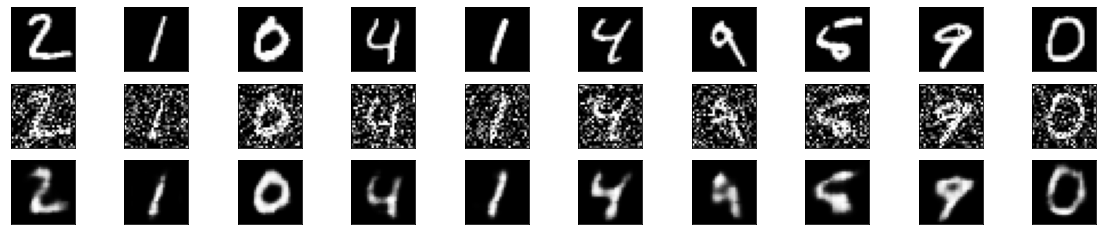

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()